In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict ,train_test_split
from sklearn.metrics import precision_score , recall_score ,f1_score ,precision_recall_curve,log_loss
import joblib

In [2]:
X = pd.read_csv(r"C:\Users\jaken\Documents\mushroom_classification\data\parameters.csv")
y = pd.read_csv(r"C:\Users\jaken\Documents\mushroom_classification\data\labels.csv")

In [3]:
y_n = y.to_numpy()

In [8]:
model_path = "models/mushroom_model.pkl"
saved_model =joblib.load(model_path)
model =joblib.load(model_path)

In [5]:
X_train ,X_test,y_train,y_test = train_test_split(
    X,y_n,
    test_size=0.2,
    random_state=5,
    shuffle=True,
)

In [6]:
X_train,X_val,y_train,y_val = train_test_split(
    X_train,y_train,
    test_size=0.0625,
    random_state=5,
    shuffle=True
    )

In [9]:
y_pred_train = model.predict(X_train)
y_pred_cv= model.predict(X_val)

In [10]:
logL_train = log_loss(y_train,y_pred_train)
logL_cv = log_loss(y_val,y_pred_cv)

In [11]:
print(f"The Training Set Loss is: {logL_train}")
print(f"The Cross Validation Test Loss is: {logL_cv}")

The Training Set Loss is: 0.5621174677886892
The Cross Validation Test Loss is: 0.7641763969424132


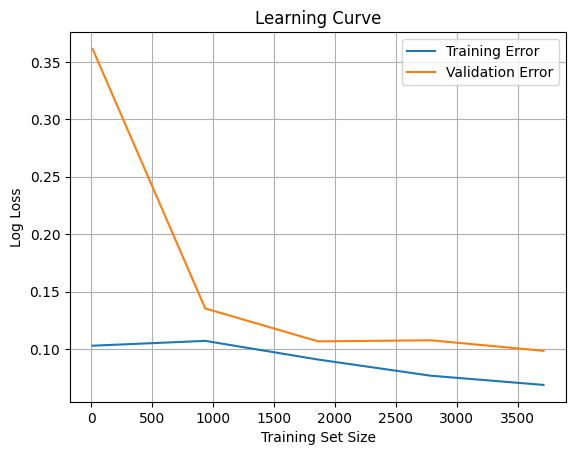

In [12]:
#learning Curve x= train size , y = log_loss (train and cv)
train_errors =[]
val_errors =[]
train_size = np.linspace(10,3712,5,dtype=int)

for size in train_size:
    X_subset = X_train[:size]
    y_subset = y_train[:size]


    model = LogisticRegression(max_iter=100,random_state=5,solver='liblinear')
    model.fit(X_subset,y_subset.ravel())

    y_subset_pred = model.predict_proba(X_subset)
    y_val_pred  = model.predict_proba(X_val)

    train_errors.append(log_loss(y_subset, y_subset_pred)) #loss on train set
    val_errors.append(log_loss(y_val, y_val_pred))#loss on cross validation


# Plot
plt.plot(train_size, train_errors, label="Training Error")
plt.plot(train_size, val_errors, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


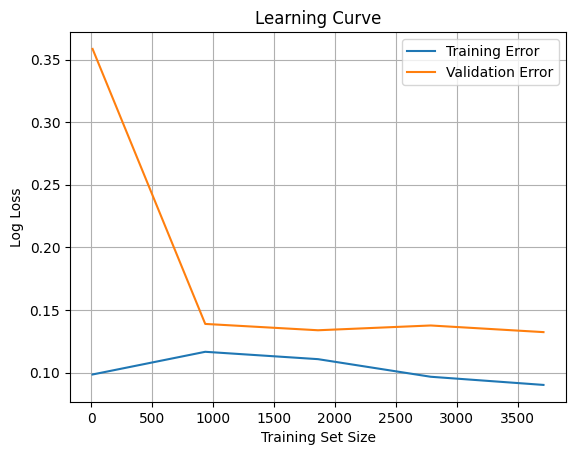

In [ ]:
#learning Curve x= train size , y = log_loss (train and cv)
train_errors =[]
val_errors =[]
train_size = np.linspace(10,3712,5,dtype=int)

for size in train_size:
    X_subset = X_train[:size]
    y_subset = y_train[:size]


    model = LogisticRegression(max_iter=100,random_state=5,solver='liblinear')
    model.fit(X_subset,y_subset.ravel())

    y_subset_pred = model.predict_proba(X_subset)
    y_val_pred  = model.predict_proba(X_val)

    train_errors.append(log_loss(y_subset, y_subset_pred)) #loss on train set
    val_errors.append(log_loss(y_val, y_val_pred))#loss on cross validation


# Plot
plt.plot(train_size, train_errors, label="Training Error")
plt.plot(train_size, val_errors, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 1/35 - Log Loss: 0.0914
Epoch 2/35 - Log Loss: 0.0799


c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 3/35 - Log Loss: 0.0730


c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 4/35 - Log Loss: 0.0687


c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 5/35 - Log Loss: 0.0659


c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 6/35 - Log Loss: 0.0641


c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jaken\miniconda3\envs\mush\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 7/35 - Log Loss: 0.0628
Epoch 8/35 - Log Loss: 0.0620
Epoch 9/35 - Log Loss: 0.0617
Epoch 10/35 - Log Loss: 0.0615
Epoch 11/35 - Log Loss: 0.0613
Epoch 12/35 - Log Loss: 0.0612
Epoch 13/35 - Log Loss: 0.0610
Epoch 14/35 - Log Loss: 0.0609
Epoch 15/35 - Log Loss: 0.0607
Epoch 16/35 - Log Loss: 0.0606
Epoch 17/35 - Log Loss: 0.0605
Epoch 18/35 - Log Loss: 0.0604
Epoch 19/35 - Log Loss: 0.0602
Epoch 20/35 - Log Loss: 0.0601
Epoch 21/35 - Log Loss: 0.0601
Epoch 22/35 - Log Loss: 0.0600
Epoch 23/35 - Log Loss: 0.0599
Epoch 24/35 - Log Loss: 0.0598
Epoch 25/35 - Log Loss: 0.0597
Epoch 26/35 - Log Loss: 0.0596
Epoch 27/35 - Log Loss: 0.0596
Epoch 28/35 - Log Loss: 0.0595
Epoch 29/35 - Log Loss: 0.0595
Epoch 30/35 - Log Loss: 0.0594
Epoch 31/35 - Log Loss: 0.0594
Epoch 32/35 - Log Loss: 0.0593
Epoch 33/35 - Log Loss: 0.0593
Epoch 34/35 - Log Loss: 0.0593
Epoch 35/35 - Log Loss: 0.0592


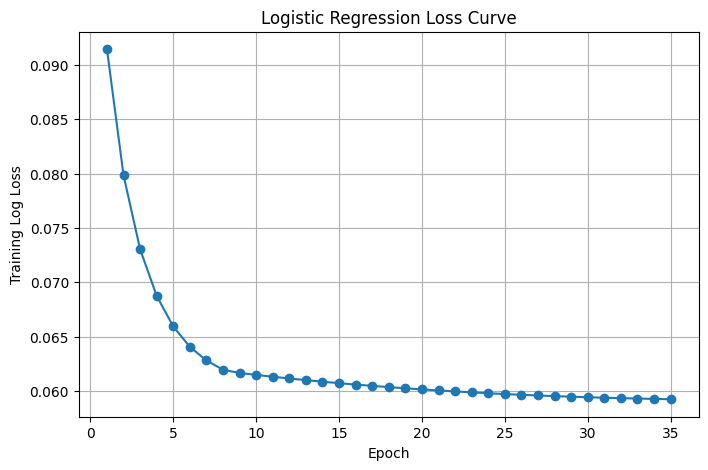

In [25]:

model = LogisticRegression(
    penalty=saved_model.penalty,
    C=saved_model.C,
    solver='saga',
    warm_start=True,
    max_iter=100,               # Only 1 iteration per epoch
    random_state=5
)


# Step 4: Training loop for loss curve
n_epochs = 35
losses = []

for epoch in range(n_epochs):
    model.fit(X_train, y_train.ravel())  # Train 1 step at a time
    y_pred_proba = model.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    losses.append(loss)
    print(f"Epoch {epoch+1}/{n_epochs} - Log Loss: {loss:.4f}")

# Step 5: Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_epochs + 1), losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training Log Loss")
plt.title("Logistic Regression Loss Curve")
plt.grid(True)
plt.show()


In [ ]:
#same model retrained
model = LogisticRegression(max_iter=1000, warm_start=True, random_state=5, solver='saga')
n_epoch = 25
losses = []

for epoch in range(n_epoch):
    model.fit(X_train, y_train.ravel())
    y_train_pred = model.predict_proba(X_train)
    loss = log_loss(y_train, y_train_pred)
    losses.append(loss)
    print(f"Epoch {epoch+1}/{n_epoch} - Log Loss: {loss:.4f}")

# Plot
plt.plot(range(n_epoch), losses)
plt.xlabel("Epoch")
plt.ylabel("Training Log Loss")
plt.title("Loss Curve")
plt.grid(True)
plt.show()
